In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('../Data/San Jose/original'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Data/San Jose/original\Arrests_2015-2020.csv
../Data/San Jose/original\Arrests_2020-2021_no_loc.csv
../Data/San Jose/original\Arrests_2020-2021_w_blkloc.csv
../Data/San Jose/original\Arrests_2021-2022.csv
../Data/San Jose/original\Arrests_All.csv
../Data/San Jose/original\Charges_2015-2020.csv
../Data/San Jose/original\Charges_2020-2021.csv
../Data/San Jose/original\Charges_2021-2022.csv
../Data/San Jose/original\Charges_All.csv
../Data/San Jose/original\Citywide Map 36x40.pdf
../Data/San Jose/original\Incidents_2015-2020.csv
../Data/San Jose/original\Incidents_2020-2021.csv
../Data/San Jose/original\Incidents_2021-2022.csv
../Data/San Jose/original\Incidents_All.csv
../Data/San Jose/original\Race_Codes.csv
../Data/San Jose/original\Race_Groups.csv


In [3]:
filepaths = []

for dirname, _, filenames in os.walk('../Data/San Jose/original'):
    for filename in filenames:
        if filename.endswith('.csv'):
            filepaths.append(os.path.join(dirname, filename))

data = {os.path.split(filepath)[-1].split('.')[0].replace('-', '_') : pd.read_csv(filepath) for filepath in filepaths}
globals().update(data)

C:\Users\CSANADANSYS\AppData\Local\Temp\ipykernel_9656\448135151.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {os.path.split(filepath)[-1].split('.')[0].replace('-', '_') : pd.read_csv(filepath) for filepath in filepaths}
C:\Users\CSANADANSYS\AppData\Local\Temp\ipykernel_9656\448135151.py:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {os.path.split(filepath)[-1].split('.')[0].replace('-', '_') : pd.read_csv(filepath) for filepath in filepaths}
C:\Users\CSANADANSYS\AppData\Local\Temp\ipykernel_9656\448135151.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = {os.path.split(filepath)[-1].split('.')[0].replace('-', '_') : pd.read_csv(filepath) for filepath in filepaths}


In [4]:
arrests = Arrests_All
charges = Charges_All
incidents = Incidents_All

In [29]:
# Removing columns with duplicated arresteee ID - incident ID combinations
arrests = arrests.loc[(arrests.duplicated(subset=['PIN', 'GO NO'], keep='first') == False)]
# Removing rows without an incident ID
arrests = arrests.loc[arrests['GO NO'].notna()]
arrests['INCIDENT NO'] = arrests['GO NO'].str[6:]
# Filtering out rows where incident ID contains characters not contained by incident IDs in the incidents dataframe
arrests = arrests.loc[arrests['INCIDENT NO'].str.contains('[A-Za-z]', regex=True) == False]
arrests['INCIDENT NO'] = arrests['INCIDENT NO'].astype('int')
# Removing duplicated rows from incidents
incidents = incidents.loc[incidents.duplicated(keep='first') == False]
# Merging arrests to incidents by incident ID
merged = arrests.merge(incidents, on='INCIDENT NO', how='left')
merged = merged.loc[merged.duplicated(subset=['PIN', 'INCIDENT NO', 'INCIDENT DESCRIPTION'], keep='first') == False]
# Delete rows which did not have a matching incident
merged.loc[merged[['RPT DATE', 'RPT TIME', 'INCIDENT DESCRIPTION', 'BLOCK ADDRESS', 'BEAT_y']].isna().all(axis=1) == False]
relapsing = merged.loc[merged.duplicated(subset=['PIN'], keep=False) == True]
relapsing = relapsing[['PIN', 'INCIDENT NO']]
relapsing = relapsing.groupby(by='PIN').count()
relapsing['Counter'] = 1
relapsing = relapsing.groupby(by='INCIDENT NO').count()

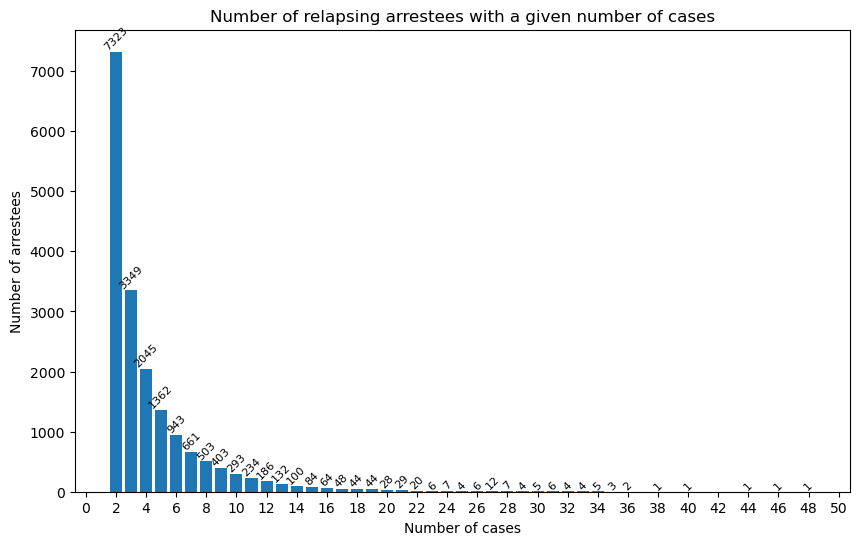

In [34]:
plt.figure(figsize=(10, 6))
bars = plt.bar(relapsing.index, relapsing['Counter'])
plt.xticks(np.arange(0, 52, 2))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', rotation=45, fontsize=8)
plt.xlabel('Number of cases')
plt.ylabel('Number of arrestees')
plt.title('Number of relapsing arrestees with a given number of cases')
plt.show()